In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
#pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import MeanShift
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the data
data=pd.read_csv("D:\Beinex\Python\Dataset-Kaggle\\bank_transactions.csv")
data

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


      Explorative Data Analysis and Feature Engineering

In [3]:
data.shape

(1048567, 9)

In [4]:
#since the data has more than 10 lakh rows selecting random sample of 100000
data = data.sample(n=200000, random_state=42)

In [5]:
#finding data with null values
data.isna().any()

TransactionID              False
CustomerID                 False
CustomerDOB                 True
CustGender                  True
CustLocation                True
CustAccountBalance          True
TransactionDate            False
TransactionTime            False
TransactionAmount (INR)    False
dtype: bool

In [6]:
#removing rows where the CustomerBOB is missing
print("No of columns removed where DOB is missing",200000-len(data.dropna(subset='CustomerDOB')))
data=data.dropna(subset='CustomerDOB')
data.shape

No of columns removed where DOB is missing 636


(199364, 9)

In [7]:
#imputation of missing values in gender and CustLocation based on mode value
data['CustGender'] = data['CustGender'].fillna(data['CustGender'].mode()[0])
data['CustLocation'] = data['CustLocation'].fillna(data['CustLocation'].mode()[0])
#checking whether imputation applied properly
data['CustGender'].isna().any()

False

In [8]:
#imputation of missing values in customer account balance to 0
data['CustAccountBalance']=data['CustAccountBalance'].fillna(0)
data.isna().any()

TransactionID              False
CustomerID                 False
CustomerDOB                False
CustGender                 False
CustLocation               False
CustAccountBalance         False
TransactionDate            False
TransactionTime            False
TransactionAmount (INR)    False
dtype: bool

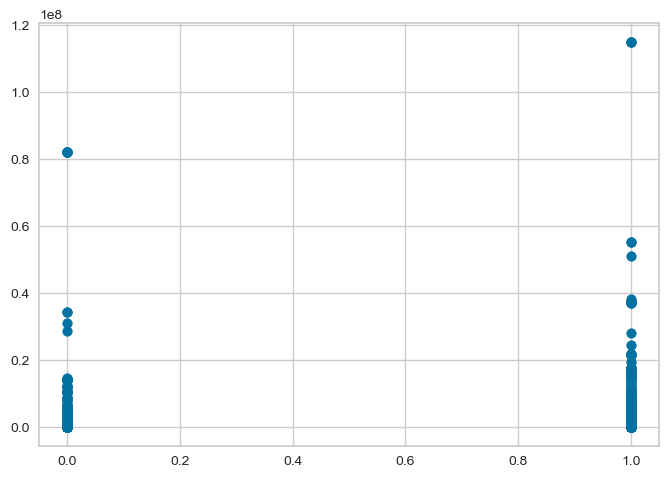

In [9]:
#replacing gender values to int 
data['CustGender']=LabelEncoder().fit_transform(data['CustGender'])#1 for male and 0 for female
# Create a scatter plot of two variables
plt.scatter(data['CustGender'], data['CustAccountBalance'])
plt.show()

In [10]:
#data shows '0'/female has less bankaccount balance associated 
# while Males might be having higher bank account balance
#certain outliers are observed in the account balance value

In [11]:
#removing duplicates
data=data.drop_duplicates()
data.shape

(199364, 9)

In [12]:
#No duplicate values found

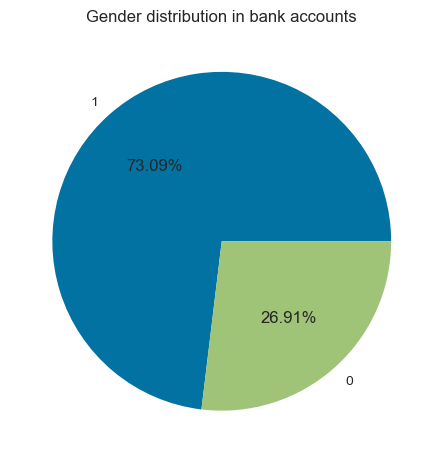

In [13]:
labels = data.CustGender.value_counts().keys()
values = data.CustGender.value_counts().values

plt.pie(values,labels=labels,autopct='%1.2f%%')
plt.title('Gender distribution in bank accounts')
plt.show()

In [14]:
#Insights
#More than 70% of the bank accounts are holded Male, which implies the banks can come up with certain femlae 
#focused savings plan to improve the distribustion 

In [15]:
#since the entire dataset cover the period 2016, the current date has been set to 10/03/2017 for better recency analysis
current_date=datetime(2017,3, 10)

In [16]:
#changing CustomerDOB and TransactionDate to date datatype
data['CustomerDOB']=pd.to_datetime(data['CustomerDOB'])
data['TransactionDate']=pd.to_datetime(data['TransactionDate'])


#calculate age column
data['Age']=current_date.year-data['CustomerDOB'].dt.year

#since age is an important factor in the analysis all the rows with incorrect DOBs are dropped
data=data.drop(data[data['Age']<=0].index)
data


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
892845,T892846,C5725279,1984-08-09,1,JASPUR,84447.82,2016-07-09,183210,11858.0,33
444994,T444995,C4588538,1994-02-01,1,GURGAON,12549.49,2016-08-16,161300,250.0,23
614896,T614897,C2416476,1990-11-14,1,NEW DELHI,33607.65,2016-08-26,102007,3360.0,27
457036,T457037,C5940151,1990-09-15,1,HYDERABAD,38238.86,2016-08-21,110438,250.0,27
997441,T997442,C5922989,1988-11-27,1,PURBO MEDINIPUR,9506.85,2016-09-14,90810,33.0,29
...,...,...,...,...,...,...,...,...,...,...
555447,T555448,C1420929,1992-03-20,0,GURGAON,101815.65,2016-08-22,4951,61.0,25
978492,T978493,C7843417,1990-03-03,1,NOIDA,23817.50,2016-09-15,131759,3697.0,27
209622,T209623,C5112961,1992-12-28,1,DELHI,3200.83,2016-03-09,134534,323.0,25
558840,T558841,C2240058,1990-11-10,1,PHASE 1 HINJEWADI PUNE,74033.49,2016-08-22,135657,1000.0,27


In [17]:
#based on age customers are categorized into different age categories
data['Age']=pd.to_numeric(data['Age'])
data['Categ']='other'

for i, row in data.iterrows():
    if  row['Age']>0 and row['Age']<=18:
        data.loc[i, 'Categ']="Child"
    elif  row['Age']>18 and row['Age']<=40:
        data.loc[i, 'Categ']="Youth"
    elif  row['Age']>40 and row['Age']<=60:
        data.loc[i, 'Categ']="Middle_Age"
    elif row['Age']>60:
        data.loc[i, 'Categ']="Old"
data.head(15)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age,Categ
892845,T892846,C5725279,1984-08-09,1,JASPUR,84447.82,2016-07-09,183210,11858.00,33,Youth
444994,T444995,C4588538,1994-02-01,1,GURGAON,12549.49,2016-08-16,161300,250.00,23,Youth
614896,T614897,C2416476,1990-11-14,1,NEW DELHI,33607.65,2016-08-26,102007,3360.00,27,Youth
457036,T457037,C5940151,1990-09-15,1,HYDERABAD,38238.86,2016-08-21,110438,250.00,27,Youth
997441,T997442,C5922989,1988-11-27,1,PURBO MEDINIPUR,9506.85,2016-09-14,90810,33.00,29,Youth
518219,T518220,C8296884,1989-10-31,1,BANGALORE,635863.63,2016-08-19,215646,2688.00,28,Youth
778232,T778233,C6671851,1800-01-01,1,SHOPPING COMPLEX THIRUVANATHAPURAM,5867.38,2016-06-09,193036,870.00,217,Old
151835,T151836,C8927812,1987-03-03,1,NEW DELHI,63911.56,2016-04-08,30857,499.00,30,Youth
446575,T446576,C7511745,1992-03-23,0,GURGAON,19853.15,2016-08-16,183906,280.00,25,Youth
887527,T887528,C6126877,1993-01-10,1,GURGAON,3848.86,2016-07-09,201500,203.45,24,Youth


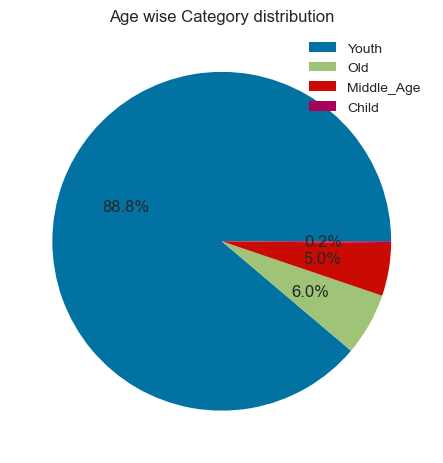

In [18]:
#plotting gender distribution
gender=data['Categ'].value_counts()
plt.pie(gender,autopct='%1.1f%%')
plt.legend(gender.index)
plt.title("Age wise Category distribution")
plt.show()

In [19]:
#the most consumer belongs to middle_age category (40-60).
#The old and youth taskes somewhat similar proportion

      RFM Calculation

In [20]:
#Calculation of Recency value
#Recency value is calculated by taking the difference between current date and transaction date
def calculate_date_difference(row):
    return (current_date- row['TransactionDate']).days
data['Recency']=data.apply(calculate_date_difference,axis=1)
data

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age,Categ,Recency
892845,T892846,C5725279,1984-08-09,1,JASPUR,84447.82,2016-07-09,183210,11858.0,33,Youth,244
444994,T444995,C4588538,1994-02-01,1,GURGAON,12549.49,2016-08-16,161300,250.0,23,Youth,206
614896,T614897,C2416476,1990-11-14,1,NEW DELHI,33607.65,2016-08-26,102007,3360.0,27,Youth,196
457036,T457037,C5940151,1990-09-15,1,HYDERABAD,38238.86,2016-08-21,110438,250.0,27,Youth,201
997441,T997442,C5922989,1988-11-27,1,PURBO MEDINIPUR,9506.85,2016-09-14,90810,33.0,29,Youth,177
...,...,...,...,...,...,...,...,...,...,...,...,...
555447,T555448,C1420929,1992-03-20,0,GURGAON,101815.65,2016-08-22,4951,61.0,25,Youth,200
978492,T978493,C7843417,1990-03-03,1,NOIDA,23817.50,2016-09-15,131759,3697.0,27,Youth,176
209622,T209623,C5112961,1992-12-28,1,DELHI,3200.83,2016-03-09,134534,323.0,25,Youth,366
558840,T558841,C2240058,1990-11-10,1,PHASE 1 HINJEWADI PUNE,74033.49,2016-08-22,135657,1000.0,27,Youth,200


In [21]:
#The categorical variable are change to numercal values using LabelEncoder method
data['Categ']=LabelEncoder().fit_transform(data['Categ'])
data['CustLocation']=LabelEncoder().fit_transform(data['CustLocation'])
data

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age,Categ,Recency
892845,T892846,C5725279,1984-08-09,1,2132,84447.82,2016-07-09,183210,11858.0,33,3,244
444994,T444995,C4588538,1994-02-01,1,1846,12549.49,2016-08-16,161300,250.0,23,3,206
614896,T614897,C2416476,1990-11-14,1,3407,33607.65,2016-08-26,102007,3360.0,27,3,196
457036,T457037,C5940151,1990-09-15,1,2018,38238.86,2016-08-21,110438,250.0,27,3,201
997441,T997442,C5922989,1988-11-27,1,3970,9506.85,2016-09-14,90810,33.0,29,3,177
...,...,...,...,...,...,...,...,...,...,...,...,...
555447,T555448,C1420929,1992-03-20,0,1846,101815.65,2016-08-22,4951,61.0,25,3,200
978492,T978493,C7843417,1990-03-03,1,3457,23817.50,2016-09-15,131759,3697.0,27,3,176
209622,T209623,C5112961,1992-12-28,1,1226,3200.83,2016-03-09,134534,323.0,25,3,366
558840,T558841,C2240058,1990-11-10,1,3815,74033.49,2016-08-22,135657,1000.0,27,3,200


In [22]:
#Frequency measured using the number of transactions performed by the consumer during the period considered 
data['Frequency']=data.groupby('CustomerID')['TransactionID'].transform(lambda x:x.count())
data['Frequency'].unique()

array([1, 2, 3, 4], dtype=int64)

In [23]:
#Monetary value calculation
#Weighted monetary varlue is calculated based on 'CustAccountBalance' and 'TransactionAmount (INR)'
#Assuming the bank preferes customers with more net worth, more weightage (0.7) is given to 'CustAccountBalance'	
data['Monetary']=100*(0.7*(data['CustAccountBalance'])+ 0.3*(data['TransactionAmount (INR)']))
data

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age,Categ,Recency,Frequency,Monetary
892845,T892846,C5725279,1984-08-09,1,2132,84447.82,2016-07-09,183210,11858.0,33,3,244,1,6267087.4
444994,T444995,C4588538,1994-02-01,1,1846,12549.49,2016-08-16,161300,250.0,23,3,206,1,885964.3
614896,T614897,C2416476,1990-11-14,1,3407,33607.65,2016-08-26,102007,3360.0,27,3,196,2,2453335.5
457036,T457037,C5940151,1990-09-15,1,2018,38238.86,2016-08-21,110438,250.0,27,3,201,1,2684220.2
997441,T997442,C5922989,1988-11-27,1,3970,9506.85,2016-09-14,90810,33.0,29,3,177,1,666469.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555447,T555448,C1420929,1992-03-20,0,1846,101815.65,2016-08-22,4951,61.0,25,3,200,1,7128925.5
978492,T978493,C7843417,1990-03-03,1,3457,23817.50,2016-09-15,131759,3697.0,27,3,176,1,1778135.0
209622,T209623,C5112961,1992-12-28,1,1226,3200.83,2016-03-09,134534,323.0,25,3,366,1,233748.1
558840,T558841,C2240058,1990-11-10,1,3815,74033.49,2016-08-22,135657,1000.0,27,3,200,1,5212344.3


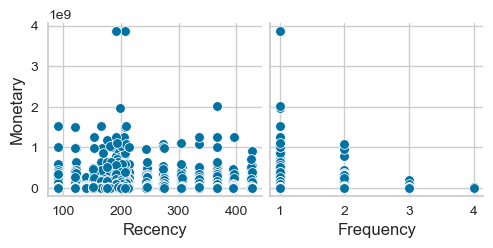

In [24]:
#pairplot to analyse the relation b\w RFM values
sns.pairplot(data, x_vars=["Recency", "Frequency"], y_vars=["Monetary"])
plt.show()

In [25]:
#the plot discovers the recent customers have contributed more into the monetary values. 
#since we have given less weightage to transactions, frequent customer does not really add up to the monetar contribution

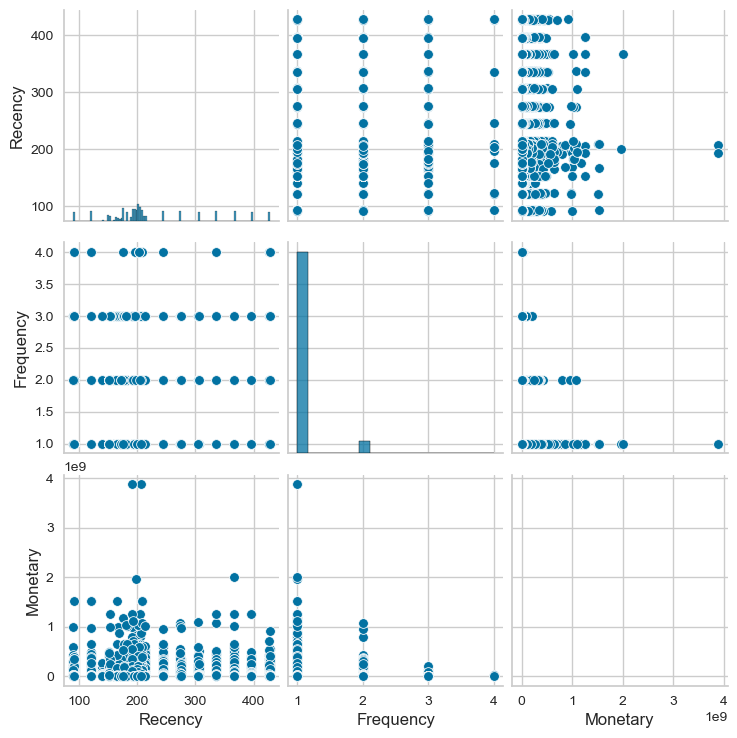

In [26]:
sns.pairplot(data[[ "Recency","Frequency","Monetary"]])

In [27]:
#Normalization of RM 
#normalization to remove the outliers and modify into log distribution
data['Recency']=np.log1p(data['Recency'])
data['Monetary']=np.log1p(data['Monetary'])

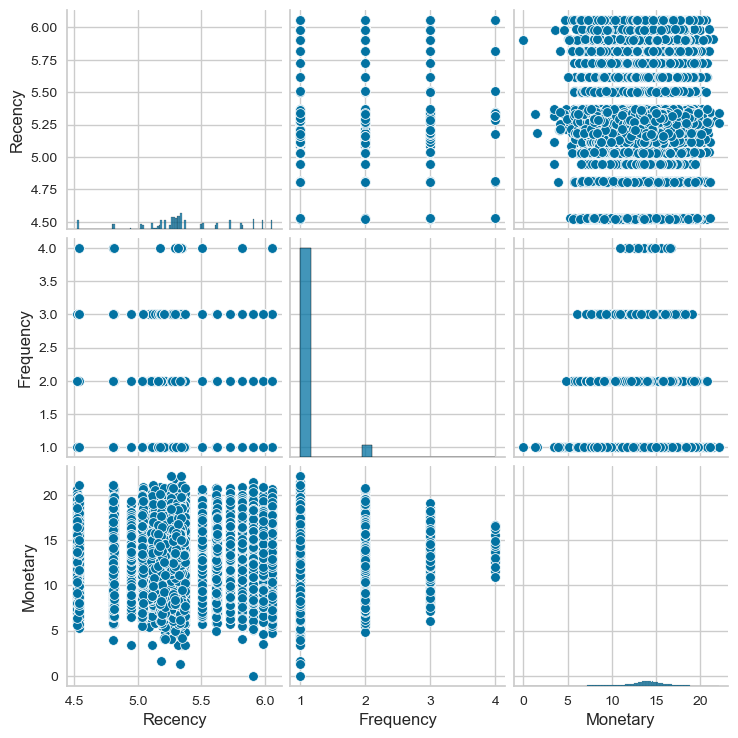

In [28]:
sns.pairplot(data[[ "Recency","Frequency","Monetary"]])

In [29]:
#scaling data, to bring variables to a similar numeric range or address differences in scales
RFM=data[["Recency","Frequency","Monetary"]]
from sklearn.preprocessing import StandardScaler
RFM_s = pd.DataFrame(StandardScaler().fit_transform(RFM))
#Renaming the columns
RFM_s.columns=["RecencyS","FrequencyS","MonetaryS"]
RFM_s.head()
#keeping a copy of data in RFM_a
RFM_a=RFM_s

      Unsupervised Learning Methods

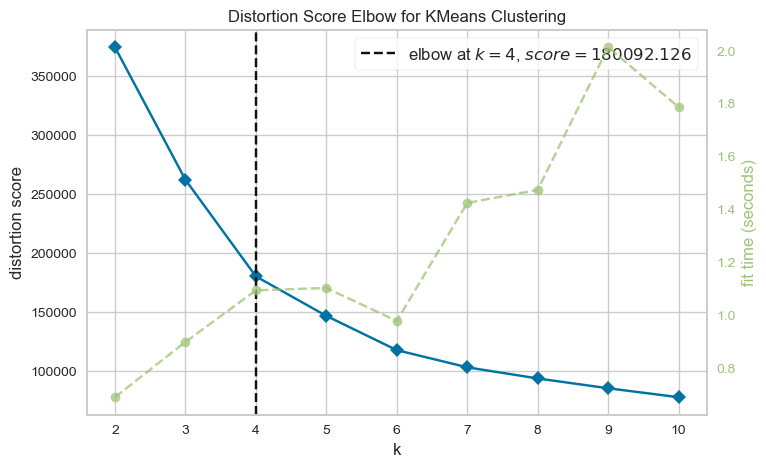

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [30]:
plt.figure(figsize=(8,5))
Elbow_Curve=KElbowVisualizer(KMeans(), k=10).fit(RFM_s)
Elbow_Curve.show()

In [31]:
#KMeans Clustering
kmeans=KMeans(n_clusters=4,max_iter=40)
kmeans.fit(RFM_s)

KMeans(max_iter=40, n_clusters=4)

In [32]:
RFM_s["clusters"]=kmeans.labels_
RFM["clusters"]=kmeans.labels_
data["clusters"] = kmeans.labels_
RFM_s.head()
RFM_s['clusters'].unique()

array([1, 3, 0, 2])

In [33]:
#centriods
print(kmeans.cluster_centers_)


[[ 1.34147031e+00 -2.47015193e-01  1.70474894e-01]
 [-5.16281686e-01 -2.47015193e-01  4.88970377e-01]
 [-2.43464422e-01 -2.47015193e-01 -1.32859530e+00]
 [ 1.43641512e-03  3.87436029e+00 -7.80079997e-03]]


In [34]:
#grouping the data in accorandance with each cluster seperately
clus_1=RFM_s[RFM_s["clusters"]==0]
clus_2=RFM_s[RFM_s["clusters"]==1]
clus_3=RFM_s[RFM_s["clusters"]==2]
clus_4=RFM_s[RFM_s["clusters"]==3]

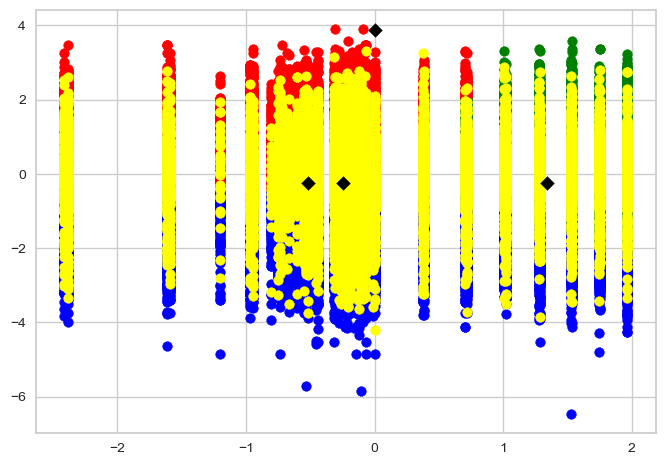

In [35]:
#plot scatterplot for each cluster point
plt.scatter(clus_1["RecencyS"],clus_1['MonetaryS'],color='green') #clus_1["FrequencyS"]
plt.scatter(clus_2["RecencyS"],clus_2['MonetaryS'],color='red') #
plt.scatter(clus_3["RecencyS"],clus_3['MonetaryS'],color='blue')
plt.scatter(clus_4["RecencyS"],clus_4['MonetaryS'],color='yellow')

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='D', label='centroid')
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color="black",marker="+",label="centroid")

Text(0.5, 1.0, 'Recency v/s Clusters')

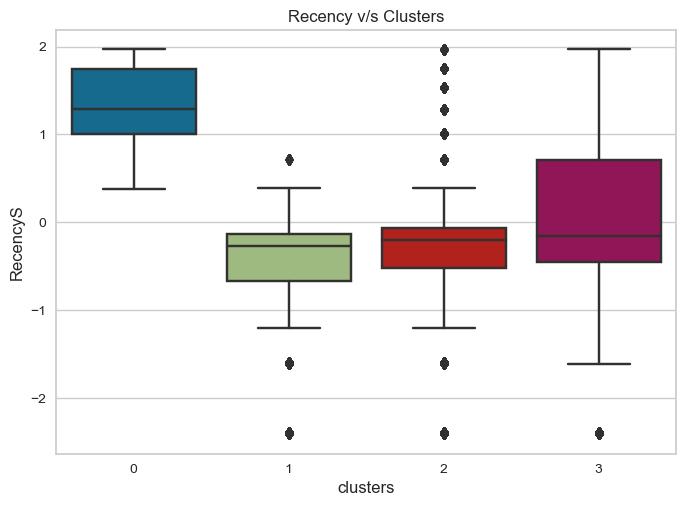

In [36]:
sns.boxplot(x="clusters",y="RecencyS",data=RFM_s).set_title("Recency v/s Clusters")

Text(0.5, 1.0, 'Monetar v/s Clusters')

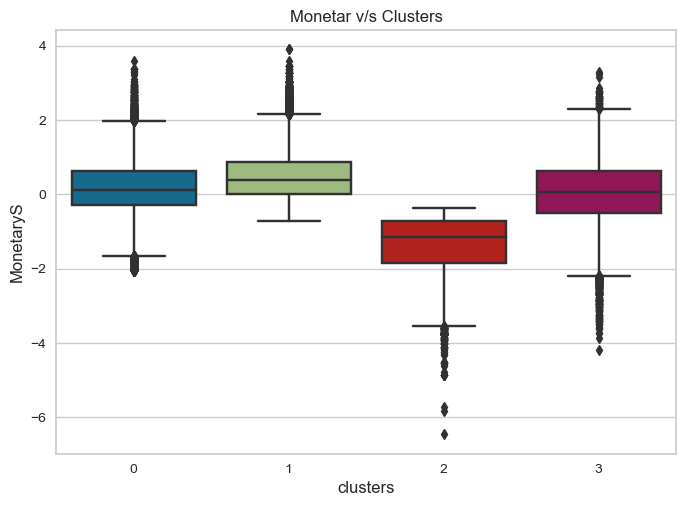

In [37]:
sns.boxplot(x="clusters",y="MonetaryS",data=RFM_s).set_title("Monetar v/s Clusters")

In [38]:
X=RFM_s[["RecencyS","FrequencyS","MonetaryS"]]
#performance score of kmeans clustering 
from sklearn.metrics import silhouette_score
Y_pred=kmeans.fit_predict(X)
silhouette_avg = silhouette_score(X,Y_pred)
silhouette_avg

0.40829491967628784

In [39]:
RFM_a.shape

(183148, 4)

In [42]:
#performing agglomerative Hierarchical clustering
Y_pred=AgglomerativeClustering(n_clusters=3).fit_predict(X)
#Calculation of silhoutte score
silhouette_avg=silhouette_score(X, Y_pred)
silhouette_avg

MemoryError: Unable to allocate 125. GiB for an array with shape (16771503378,) and data type float64

In [43]:

#performing Mean Shift Clustering
#mean shift clustering selects number of clusters automatically
Y_pred=MeanShift().fit_predict(X)

#Calculation of silhoutte score
silhouette_avg=silhouette_score(X, Y_pred)
silhouette_avg

KeyboardInterrupt: 

In [ ]:
# Generate sample data
X, _ = make_moons(n_samples=200, noise=0.05, random_state=42)

# Define a range of values for eps and min_samples
eps_values = [0.1, 0.2, 0.3]
min_samples_values = [5, 10, 15, 20]

best_eps = None
best_min_samples = None
best_num_clusters = -1

# Iterate over combinations of eps and min_samples
for eps in eps_values:
    for min_samples in min_samples_values:
        # Perform DBSCAN clustering
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X)

        # Count the number of clusters (excluding noise points)
        num_clusters = len(set(labels)) - (1 if -1 in labels else 0)

        # Update the best hyperparameters if the current clustering has more clusters
        if num_clusters > best_num_clusters:
            best_eps = eps
            best_min_samples = min_samples
            best_num_clusters = num_clusters
print('eps: ',eps)
print('no of clusters: ',best_num_clusters)
print('minimum samples: ',best_min_samples)

eps:  0.3
no of clusters:  19
minimum samples:  5


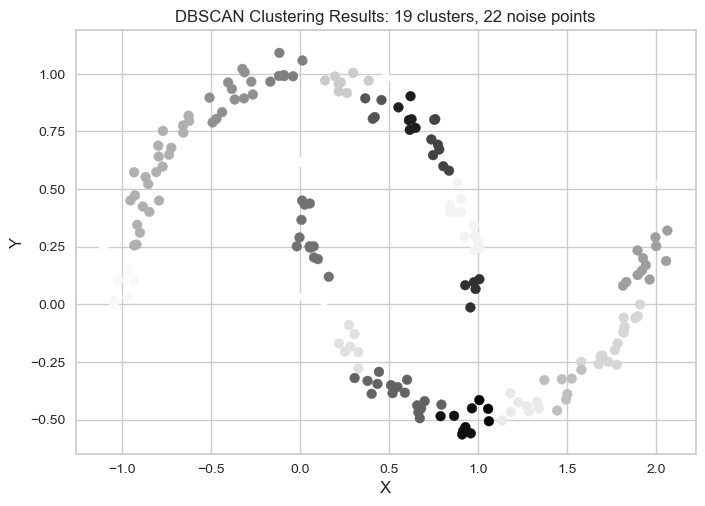

In [ ]:
# Perform DBSCAN clustering with the best hyperparameters
dbscan=DBSCAN(eps=best_eps, min_samples=best_min_samples)
labels=dbscan.fit_predict(X)

# Number of clusters and noise points
n_clusters=len(set(labels)) - (1 if -1 in labels else 0)
n_noise= list(labels).count(-1)

# Plot the clusters and noise points
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title(f"DBSCAN Clustering Results: {n_clusters} clusters, {n_noise} noise points")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


In [ ]:
silhouette_avg = silhouette_score(X, labels)
silhouette_avg

0.3363724746905676

The analysis used 4 different unsupervised learning algorithms
- Kmeans
- Agglomerative Hierarchical clustering 
- Mean Shift clustering 
- DBSCAN 
The quality of clusters created through these algorithms are measured using Silhoutte score

Based on the score, **mean shift clustering** was the best algorithm that got highest Silhouttte score. 
Kmeans and Agglomerative clustering were also able to get a score above 40
Although the plotting done through DBSCAN is informative, it considers 200 samples. DBSCAN is more resourse consuming, yet it is able to avoid noises in the data efficiently. It is also observed that passing the entire data to DBSCAN generated 1 cluster, even with the eps value like 0.8


    Deriving RFM Score & Customer Segmentation

In [ ]:
#Assign scores for RFM value
B1=np.linspace(RFM["Recency"].min(),RFM["Recency"].max(),5)
RFM["R_score"] = pd.cut(RFM["Recency"],B1,labels=[4,3,2,1],include_lowest=True)

B2=np.linspace(RFM["Frequency"].min(),RFM["Frequency"].max(),5)
RFM["F_score"]=pd.cut(RFM["Frequency"],B2,labels=[1,2,3,4],include_lowest=True)

B3=np.linspace(RFM["Monetary"].min(),RFM["Monetary"].max(),5)
RFM["M_score"] = pd.cut(RFM["Monetary"],B3,labels=[1,2,3,4],include_lowest=True)

RFM["RFM SCORE"] = RFM["R_score"].astype(str)+RFM["F_score"].astype(str)+RFM["M_score"].astype(str)
RFM.head()

,Recency,Frequency,Monetary,clusters,R_score,F_score,M_score,RFM SCORE
892845,5.501258,1,15.650822,1,2,1,3,213
444994,5.332719,1,13.694433,1,2,1,3,213
614896,5.283204,2,14.712959,2,3,2,3,323
457036,5.308268,1,14.802901,1,2,1,3,213
997441,5.181784,1,13.409751,1,3,1,3,313


In [ ]:
#creating dictionary for categorizing customers into dofferent segments
dict={r'[4][4][4]': 'STAR customer',
    r'[4][3-4][4]': 'Loyal-High NW customer',
    r'[3-4][1-4][4]':'High Net worth',
    r'[1-4][1-4][4]': 'Sleeping-Saving',
    r'[1-4][1-4][2-3]':'Emerging High-savers',
    r'[1-4][1-4][1]': 'Small customers'}

data['segment']=RFM['RFM SCORE'].replace(dict,regex=True)
data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age,Categ,Recency,Frequency,Monetary,clusters,segment
892845,T892846,C5725279,1984-08-09,1,2132,84447.82,2016-07-09,183210,11858.0,33,3,5.501258,1,15.650822,1,Emerging High-savers
444994,T444995,C4588538,1994-02-01,1,1846,12549.49,2016-08-16,161300,250.0,23,3,5.332719,1,13.694433,1,Emerging High-savers
614896,T614897,C2416476,1990-11-14,1,3407,33607.65,2016-08-26,102007,3360.0,27,3,5.283204,2,14.712959,2,Emerging High-savers
457036,T457037,C5940151,1990-09-15,1,2018,38238.86,2016-08-21,110438,250.0,27,3,5.308268,1,14.802901,1,Emerging High-savers
997441,T997442,C5922989,1988-11-27,1,3970,9506.85,2016-09-14,90810,33.0,29,3,5.181784,1,13.409751,1,Emerging High-savers


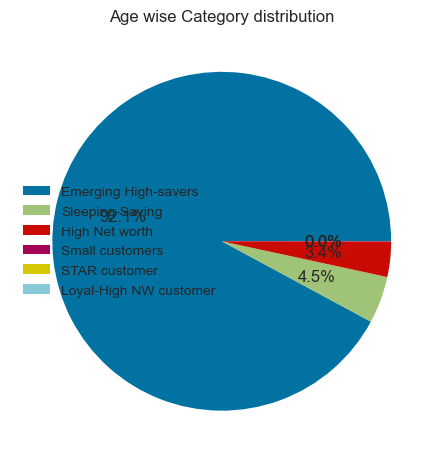

In [ ]:
Cust_seg=data['segment'].value_counts()
plt.pie(Cust_seg,autopct='%1.1f%%')
plt.legend(Cust_seg.index)
plt.title("Age wise Category distribution")
plt.show()

In [ ]:
#Inference: The bank has a huge proportion of emerging savers accounts. Bank has to focus on introducing new savings plan for this customer segment